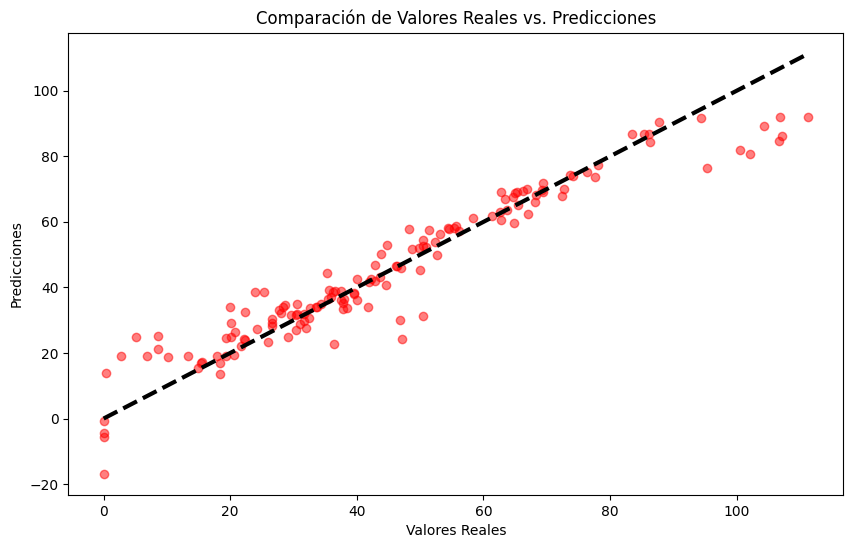

Mean Squared Error (MSE): 56.73334139834586
Root Mean Squared Error (RMSE): 7.532153835281503
Akaike Information Criterion (AIC): 589.5241380263832
Bayesian Information Criterion (BIC): 601.4033912246872


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carga de datos
data = pd.read_csv('/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BBDD/AndujarTempTiendas_def.csv', encoding='latin1')

# Seleccionar las variables independientes y la variable dependiente
X = data[['T.Max', 'T.Min', 'Precipitaciones']]
y = data['CANTIDAD_TOTAL']

# Preprocesar los datos, eliminar filas con valores nulos
df = data.dropna(subset=['CANTIDAD_TOTAL', 'T.Max', 'T.Min', 'Precipitaciones'])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['T.Max', 'T.Min', 'Precipitaciones']], df['CANTIDAD_TOTAL'], test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Número de parámetros (coeficientes + intercepto)
p = X_train.shape[1] + 1

# Número de observaciones en el conjunto de prueba
n = len(y_test)

# Calcular SSE para AIC y BIC
sse = np.sum((y_pred - y_test) ** 2)

# Calcular AIC y BIC
aic = n * np.log(sse / n) + 2 * p
bic = n * np.log(sse / n) + np.log(n) * p

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red')  # puntos de predicción
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # línea de perfecta correlación
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.show()

# Imprimir métricas
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)


